In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [178]:
data_train = pd.read_csv('/home/hcampos/common_bioinformatics/files/csv_dataframe/xTrain/export_dataframe_DT_uy_4_TU.csv', index_col=False, header=0)
dataset = pd.read_csv('/home/hcampos/common_bioinformatics/files/csv_dataframe/dataset/1fij2var/sp005fijo/export_dataframe_DT_uy_4_TU.csv', index_col=False, header=0)

X = dataset[['min_cov', 'min_var_freq']]
Y = dataset['n']

X_sc = dataset[['min_cov', 'min_var_freq']]
Y_sc = dataset['n']

In [179]:
deg_of_poly = 3
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
clf.coef_

array([ 0.00000000e+00,  4.05546126e+02,  4.69953737e+03, -2.97364817e+01,
       -1.83789811e+03,  2.49653909e+04,  3.11052091e-01,  1.20459065e+02,
       -6.84120428e+02,  7.90252269e+04])

In [181]:
# The test set, or plotting set
N = 30
predict_x0, predict_x1 = np.meshgrid(np.linspace(X_sc.min_cov.min(), X_sc.min_cov.max(), N), 
                                     np.linspace(X_sc.min_var_freq.min(), X_sc.min_var_freq.max(), N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), predict_x1.reshape(-1, 1)), axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

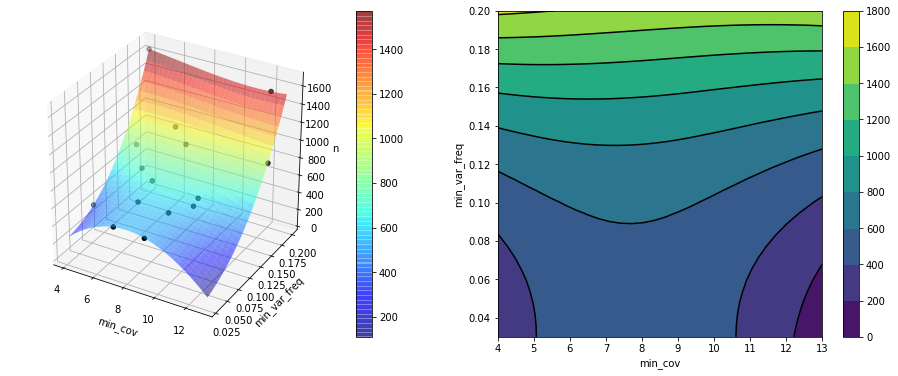

In [182]:
# Plot
fig = plt.figure(figsize=(16, 6))

#ax1 = fig.add_subplot(121, projection='3d',azim=270, elev=0)
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x1.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(X_sc.min_cov.values, X_sc.min_var_freq.values, Y_sc.values, c='black', marker='o')

fig.colorbar(surf, ax=ax1)

ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)

# set axis labels
ax1.set_xlabel('min_cov')
ax1.set_ylabel('min_var_freq')
ax1.set_zlabel('n')

# set axis labels
ax2.set_xlabel('min_cov')
ax2.set_ylabel('min_var_freq')

plt.show()
fig.savefig('/home/hcampos/Descargas/output2.pdf', bbox_inches='tight')